In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Read Data

In [2]:
data = pd.read_csv('I:\Python\dataSet\ml\Medical Cost Personal Datasets\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

# Preprocessing Data

# Outliers

In [4]:
# find the outlier data 
def find_outlier(column):
    number_cols_ph = data[column].count()
    first_quartile = np.quantile(data[column], 0.25)
    third_quartile = np.quantile(data[column], 0.75)
    IQR = third_quartile - first_quartile
    min_outlier = first_quartile - (1.5 * IQR)
    max_outlier = third_quartile + (1.5 * IQR)
    print(f'the data less than {min_outlier} and more than {max_outlier} is the outlier data in colunm {column}')
    return min_outlier, max_outlier

# remove the outlier data 
def remove_outlier(column):
    min_outlier, max_outlier = find_outlier(column)
    count_min = data[column].loc[data[column]<min_outlier].count()
    count_max = data[column].loc[data[column]>max_outlier].count()
    data[column].loc[data[column]<min_outlier] = np.nan
    data[column].loc[data[column]>max_outlier] = np.nan
    count = count_min + count_max
    return count

In [5]:
cols = []
for col in data.columns:
    if(data[col].dtype == np.int64 or data[col].dtype == np.float64):
        cols.append(col)
cols

['age', 'bmi', 'children', 'charges']

In [6]:
for col in cols[0:3]:
    count_outliers = remove_outlier(col)
    print(count_outliers)

the data less than -9.0 and more than 87.0 is the outlier data in colunm age
0
the data less than 13.7 and more than 47.290000000000006 is the outlier data in colunm bmi
9
the data less than -3.0 and more than 5.0 is the outlier data in colunm children
0


C:\Users\Mohamed Hamde\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Data Is Null?

In [7]:
data.isna().sum()

age         0
sex         0
bmi         9
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.dropna(inplace=True)

# Data Is Duplicated?

In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

# Show some of Information and Describe the Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   float64
 1   sex       1328 non-null   object 
 2   bmi       1328 non-null   float64
 3   children  1328 non-null   float64
 4   smoker    1328 non-null   object 
 5   region    1328 non-null   object 
 6   charges   1328 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.0+ KB


In [12]:
round(data.describe(),2)

,age,bmi,children,charges
count,1328.00,1328.00,1328.00,1328.00
mean,39.22,30.54,1.10,13221.05
std,14.04,5.92,1.21,11997.55
min,18.00,15.96,0.00,1121.87
25%,27.00,26.22,0.00,4744.33
50%,39.00,30.30,1.00,9369.62
75%,51.00,34.49,2.00,16604.30
max,64.00,46.75,5.00,62592.87


# Exploratory Data Analysis

In [13]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# Distribution of Region

In [14]:
region_data_proportion = data['region'].value_counts()

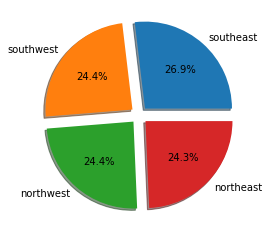

In [15]:
myexplode = [0.1, 0.1, 0.1, 0.1]
plt.pie(region_data_proportion, labels=region_data_proportion.index, autopct='%1.1f%%', explode= myexplode,shadow = True)
plt.show()

# Distribution of Smoker

In [16]:
smoker_data_proportion = data['smoker'].value_counts()

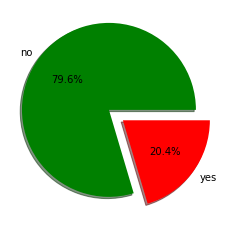

In [17]:
myexplode = [0.1, 0.1]
plt.pie(smoker_data_proportion, labels=smoker_data_proportion.index, autopct='%1.1f%%', explode= myexplode,shadow = True, colors=['green','red'])
plt.show()

# Distribution of Sex

In [18]:
sex_data_proportion = data['sex'].value_counts()

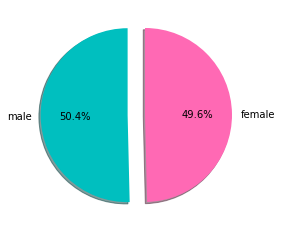

In [19]:
myexplode = [0.1, 0.1]
plt.pie(sex_data_proportion, labels=sex_data_proportion.index, autopct='%1.1f%%', startangle =90, explode= myexplode, shadow = True, colors=['c','hotpink'])
plt.show()

# Count of Smokers by Sex and Region

In [20]:
data.groupby(['region', 'sex'])['smoker'].count()

region     sex   
northeast  female    160
           male      163
northwest  female    164
           male      160
southeast  female    174
           male      183
southwest  female    161
           male      163
Name: smoker, dtype: int64

In [21]:
pd.crosstab(index=data.region, columns=data.sex, values=data.smoker, aggfunc='count')

sex,female,male
region,,
northeast,160,163
northwest,164,160
southeast,174,183
southwest,161,163


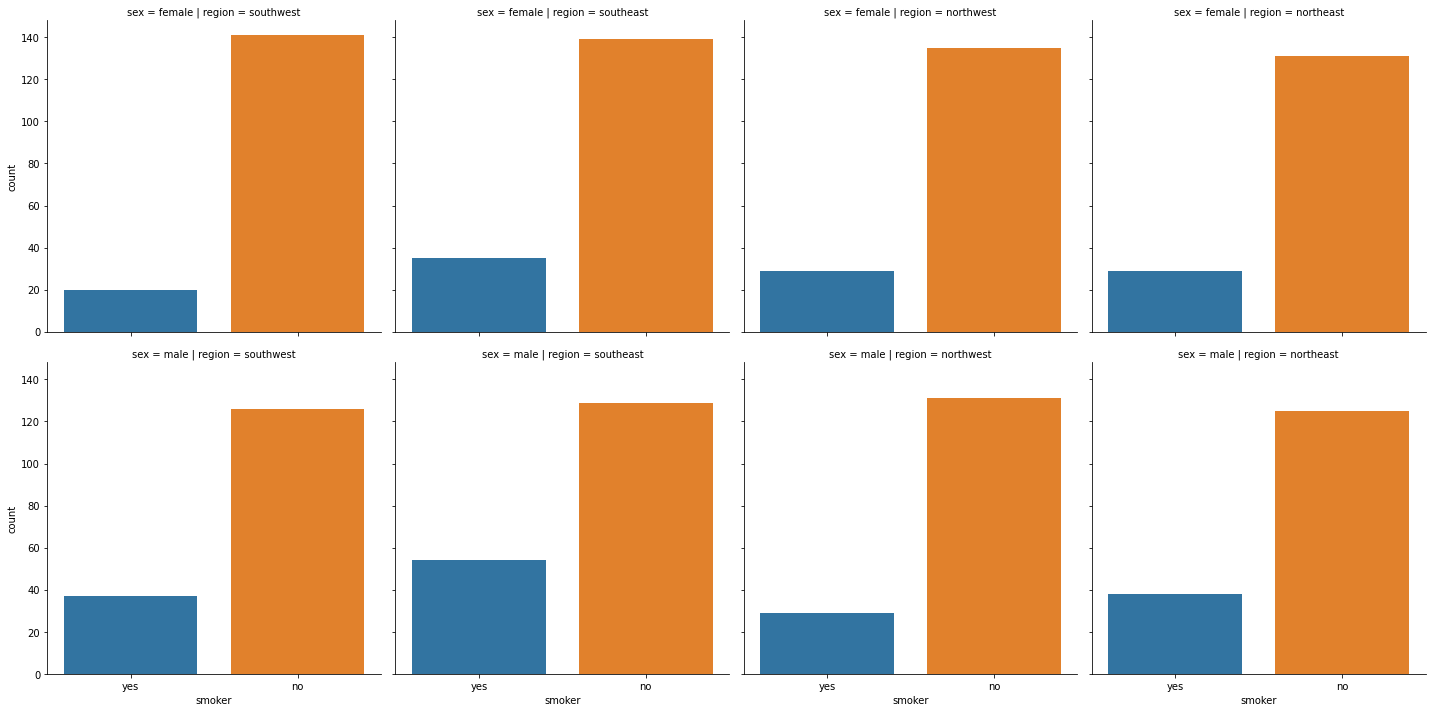

In [22]:
sns.catplot(row='sex', x='smoker', col='region', data=data, kind='count')

# Distribution of age by smokers

<AxesSubplot:xlabel='age', ylabel='Count'>

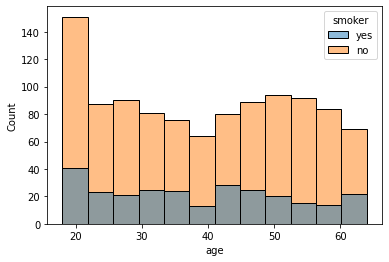

In [23]:
sns.histplot(x='age', hue='smoker',data=data)

# Distribution of age by smokers and Sex

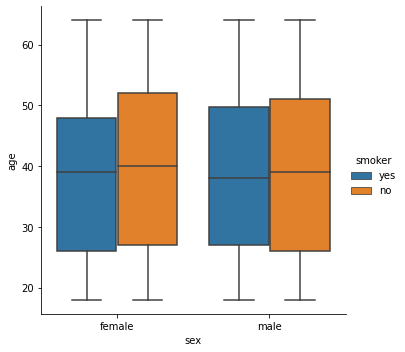

In [24]:
sns.catplot(y='age', x='sex', hue='smoker', kind='box', data=data)
plt.show()

# Distribution of age by Children and Sex

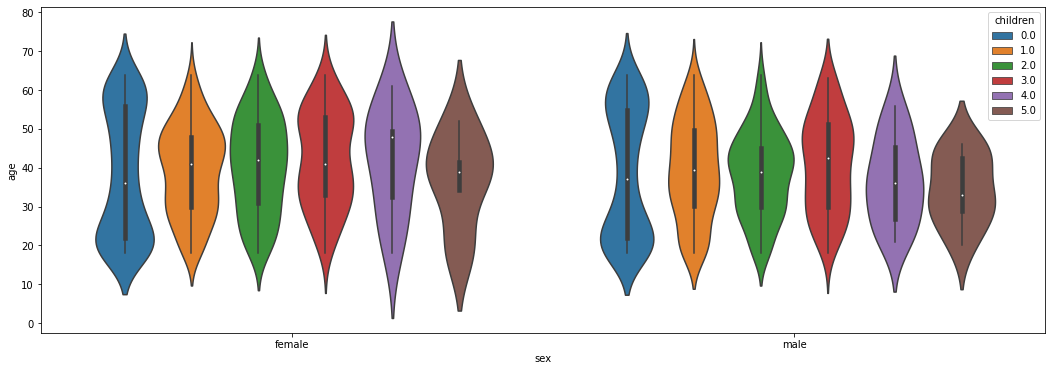

In [25]:
plt.figure(figsize=(18,6))
sns.violinplot(x=data.sex, y=data.age, hue=data.children)
plt.show()

# Machine Learning

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [27]:
data_ml = data.copy()

# Encoder Columns from Categorical to Numerical

In [28]:
lb_encoder = LabelEncoder()
data_ml['sex'] = lb_encoder.fit_transform(data_ml.sex)
data_ml['smoker'] = lb_encoder.fit_transform(data_ml.smoker)
data_ml['region'] = lb_encoder.fit_transform(data_ml.region)

In [29]:
data_ml

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1335,18.0,0,36.850,0.0,0,2,1629.83350
1336,21.0,0,25.800,0.0,0,3,2007.94500


<AxesSubplot:>

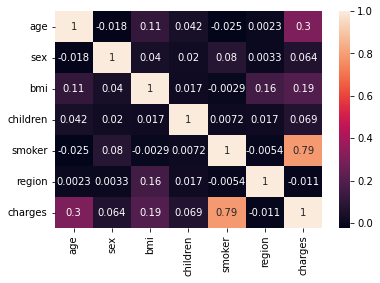

In [30]:
sns.heatmap(data_ml.corr(), annot=True)

# Data Slicing

In [106]:
X = data_ml.iloc[:, :-1].values
y = data_ml.iloc[:, -1].values

# Train and Test the Data

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=98)

# Linear Regression Model

In [141]:
model_lg = LinearRegression()
model = model_lg.fit(X_train, y_train)

In [142]:
y_pred = model.predict(X_test)

In [143]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
0,6664.68595,8335.394238
1,4340.44090,4758.169713
2,7371.77200,11090.854791
3,16657.71745,27154.125425
4,9377.90470,11140.876932
...,...,...
394,22331.56680,31960.804928
395,8671.19125,12408.562260
396,8538.28845,11204.325385
397,4296.27120,2343.372556


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

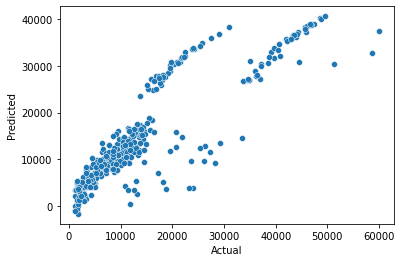

In [144]:
sns.scatterplot(x=results.Actual, y=results.Predicted)

# Evaluation the Model

In [145]:
print(model.score(X_test, y_test)*100) 
print(model.score(X_train, y_train)*100) 

77.20214182788902
73.92834443903051


In [146]:
r2_score(y_test, y_pred)*100

77.20214182788902

# Cross Validation

In [147]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X, y, cv = k_folds)

print("Average CV Score: ", scores.mean()*100)

Average CV Score:  74.6409913530183


# Comparing between actual values and predict values by plotting
* actual : blue
* prediction : orange

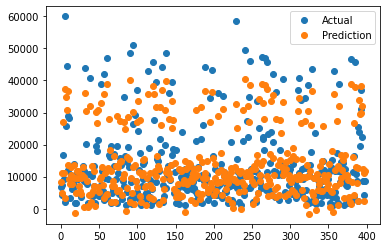

In [186]:
plt.plot(y_test, 'o', label='Actual')
plt.plot(y_pred, 'o', label='Prediction')
plt.legend()
plt.show()